In [21]:
import os, sys
import glob
import tqdm
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Data exploration

In [8]:
df = pd.read_csv('../data/HAM10k/HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
# Check for classes and counts
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [55]:
root_path = '../data/HAM10k/HAM10000_images'

images = df['image_id']

In [30]:
img_paths=[]
for i in images:
    # end=i+'.jpg'
    img_paths.append(os.path.join(root_path,str(i+'.jpg')))
    # print(os.path.join(root_path,i))


In [68]:
image_paths = glob.glob(os.path.join(root_path, (str(df['image_id'])+'.jpg')))

In [69]:
len(image_paths)

0

In [67]:
root_path

'../data/HAM10k/HAM10000_images'

In [56]:
len(glob.glob(os.path.join(root_path, '*.jpg')))

10015

In [40]:
df['dx'].unique().tolist()

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [32]:
images = [cv2.imread(i) for i in img_paths[:5]]

In [41]:
image_ids = df['image_id'].to_list()

In [42]:
image_ids

['ISIC_0027419',
 'ISIC_0025030',
 'ISIC_0026769',
 'ISIC_0025661',
 'ISIC_0031633',
 'ISIC_0027850',
 'ISIC_0029176',
 'ISIC_0029068',
 'ISIC_0025837',
 'ISIC_0025209',
 'ISIC_0025276',
 'ISIC_0029396',
 'ISIC_0025984',
 'ISIC_0025767',
 'ISIC_0032417',
 'ISIC_0031326',
 'ISIC_0025915',
 'ISIC_0031029',
 'ISIC_0029836',
 'ISIC_0032129',
 'ISIC_0032343',
 'ISIC_0025033',
 'ISIC_0027310',
 'ISIC_0032128',
 'ISIC_0025937',
 'ISIC_0027828',
 'ISIC_0029291',
 'ISIC_0030698',
 'ISIC_0025567',
 'ISIC_0031753',
 'ISIC_0026835',
 'ISIC_0031159',
 'ISIC_0031017',
 'ISIC_0024981',
 'ISIC_0027815',
 'ISIC_0024324',
 'ISIC_0029559',
 'ISIC_0030661',
 'ISIC_0027053',
 'ISIC_0028560',
 'ISIC_0031650',
 'ISIC_0029161',
 'ISIC_0026273',
 'ISIC_0025076',
 'ISIC_0029687',
 'ISIC_0025642',
 'ISIC_0025819',
 'ISIC_0032013',
 'ISIC_0031691',
 'ISIC_0025419',
 'ISIC_0030105',
 'ISIC_0025016',
 'ISIC_0029147',
 'ISIC_0029301',
 'ISIC_0026637',
 'ISIC_0030377',
 'ISIC_0027960',
 'ISIC_0026955',
 'ISIC_0028052

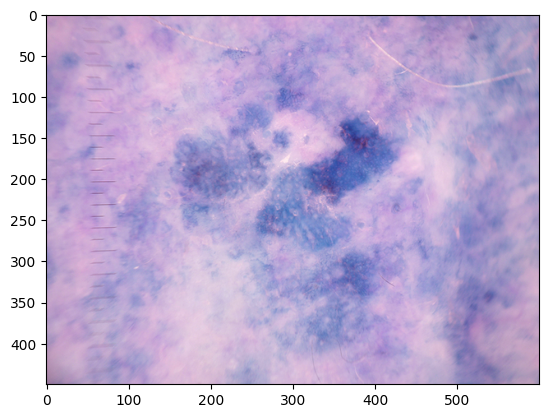

In [33]:
plt.imshow(images[0])

In [71]:
root_path

'../data/HAM10k/HAM10000_images'

In [70]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [77]:
df['image_path'] = root_path + '/'+ df['image_id'] + '.jpg'

In [78]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../data/HAM10k/HAM10000_images/ISIC_0031633.jpg


In [79]:
img = cv2.imread(df['image_path'][0])

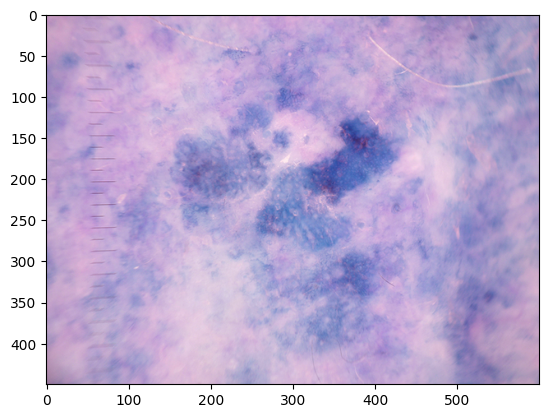

In [80]:
plt.imshow(img)

In [81]:
df.to_csv('../data/metadata.csv')